# Step 1: Import Required Libraries

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import unittest
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Step 2: Data Loading

In [2]:
# You can upload the dataset file to your Colab environment or provide a link to it
# For example, if you have the dataset file named 'customer_churn.csv' uploaded:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Step 3: Data Preprocessing


In [3]:
target_col = 'Churn'
relevant_columns = ['tenure', 'InternetService', 'OnlineSecurity', 'TechSupport', 'Contract', 'MonthlyCharges', 'TotalCharges']
X = data[relevant_columns]
y = data[target_col]

# Use LabelEncoder for categorical columns
label_encoder = LabelEncoder()
X['InternetService'] = label_encoder.fit_transform(X['InternetService'])
X['OnlineSecurity'] = label_encoder.fit_transform(X['OnlineSecurity'])
X['TechSupport'] = label_encoder.fit_transform(X['TechSupport'])
X['Contract'] = label_encoder.fit_transform(X['Contract'])
X['TotalCharges'] = label_encoder.fit_transform(X['TotalCharges'])



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





<ipython-input-3-dd853504a04d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['InternetService'] = label_encoder.fit_transform(X['InternetService'])
<ipython-input-3-dd853504a04d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['OnlineSecurity'] = label_encoder.fit_transform(X['OnlineSecurity'])
<ipython-input-3-dd853504a04d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

# Step 4: Data Scaling

In [4]:
# Handle missing values (assuming you want to fill missing values with the mean)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Model Training

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 14 is smaller than n_iter=20. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.01}
Accuracy: 0.80


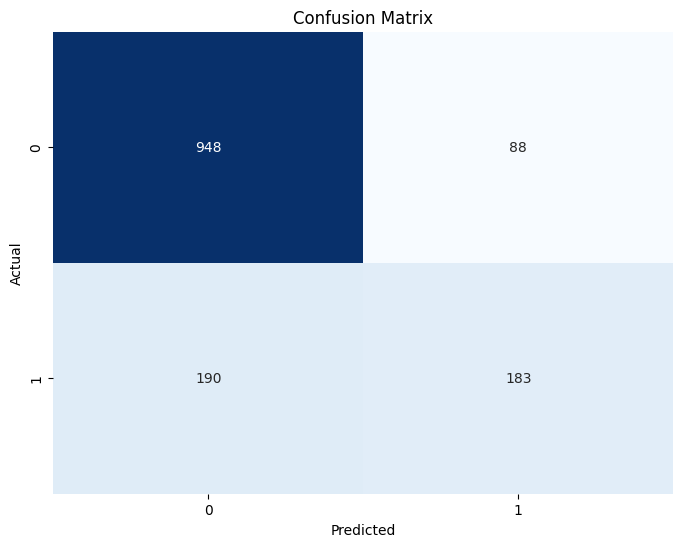

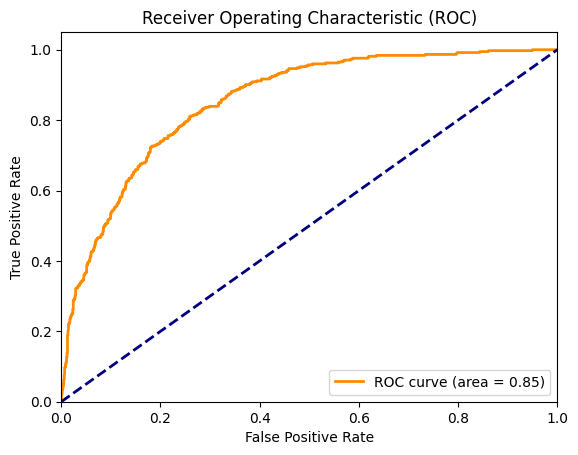

In [16]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define hyperparameters and their possible values
param_dist = {
    'C': np.logspace(-3, 3, 7),  # Range of values for regularization strength
    'penalty': ['l1', 'l2'],     # Regularization types
    'solver': ['liblinear'],     # Specify solver for logistic regression
}

# Create Randomized Search with cross-validation
random_search = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=param_dist,
    n_iter=20,                  # Number of random combinations to try
    cv=5,                       # Number of cross-validation folds
    scoring='accuracy',
    random_state=42             # For reproducibility
)





# Encode 'Churn' labels consistently
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

# Create Randomized Search with cross-validation
random_search = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42
)

# Fit the Randomized Search to your data
random_search.fit(X_train_scaled, y_train_encoded)

# Get the best hyperparameters
best_params = random_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Use the best model for predictions
best_model = random_search.best_estimator_
y_pred_encoded = best_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print(f'Accuracy: {accuracy:.2f}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



# Calculate ROC curve and ROC AUC score
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = roc_auc_score(y_test_encoded, y_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()



# Step 6 Unit Test

In [ ]:
# Create a file named /content/test_logistic_regression.py in colab and copy the content of this cell on it then run the next cell

import unittest
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import joblib
import random
import matplotlib.pyplot as plt
import seaborn as sns

class TestLogisticRegression(unittest.TestCase):

    def setUp(self):
        # Load the dataset
        self.data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

        # Define target and relevant columns
        self.target_col = 'Churn'
        all_columns = self.data.columns.tolist()
        all_columns.remove(self.target_col)  # Exclude target column
        self.X = self.data[all_columns]
        self.y = self.data[self.target_col]

        # Encode categorical columns
        label_encoder = LabelEncoder()
        for col in self.X.select_dtypes(include=['object']).columns:
            self.X[col] = label_encoder.fit_transform(self.X[col])

        # Convert 'No' to 0 and 'Yes' to 1 in y
        self.y = self.y.map({'No': 0, 'Yes': 1})

        # Split the data into training and testing sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42)

        # Data Scaling
        scaler = StandardScaler()
        self.X_train_scaled = scaler.fit_transform(self.X_train)
        self.X_test_scaled = scaler.transform(self.X_test)

        # Define hyperparameters and their possible values
        self.param_dist = {
            'C': np.logspace(-6, 6, 14),  # Range of values for regularization strength
            'penalty': ['l1', 'l2'],     # Regularization types
            'solver': ['liblinear'],     # Specify solver for logistic regression
        }

    def test_model_accuracy(self):
        best_accuracy = 0

        # Number of iterations for randomized search
        num_iterations = 1000


        for i in range(num_iterations):
            # Define the number of features to select in each iteration
            num_features_to_select = random.randint(3,8)

            # Randomly select a subset of features
            selected_features = np.random.choice(
                self.X_train_scaled.shape[1], num_features_to_select, replace=False)
            X_train_selected = self.X_train_scaled[:, selected_features]
            X_test_selected = self.X_test_scaled[:, selected_features]

            # Create Randomized Search with cross-validation
            random_search = RandomizedSearchCV(
                LogisticRegression(),
                param_distributions=self.param_dist,
                n_iter=20,                  # Number of random combinations to try
                cv=5,                       # Number of cross-validation folds
                scoring='accuracy',
                random_state=i             # Vary the random state for different iterations
            )

            # Fit the Randomized Search to your data
            random_search.fit(X_train_selected, self.y_train)

            # Use the best model for predictions
            best_model_iter = random_search.best_estimator_
            y_pred = best_model_iter.predict(X_test_selected)

            # Calculate accuracy
            accuracy = accuracy_score(self.y_test, y_pred)

            # Check if the current model has higher accuracy than the best so far
            if accuracy > best_accuracy:
                best_accuracy = accuracy

        # Assert that the achieved accuracy is greater than or equal to a specified threshold
        expected_accuracy_threshold = 0.8  # Adjust this threshold as needed
        self.assertGreaterEqual(best_accuracy, expected_accuracy_threshold)

        # Print the best accuracy
        print(f'Best Accuracy: {best_accuracy:.4f}')

        # Calculate ROC and AUC
        y_pred_proba = best_model_iter.predict_proba(X_test_selected)[:, 1]
        fpr, tpr, thresholds = roc_curve(self.y_test, y_pred_proba)
        auc = roc_auc_score(self.y_test, y_pred_proba)

        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc='lower right')
        plt.savefig('roc_curve.png')  # Save ROC curve figure

        # Calculate confusion matrix
        conf_matrix = confusion_matrix(self.y_test, y_pred)

        # Plot confusion matrix as a heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.savefig('confusion_matrix.png')  # Save confusion matrix figure

if __name__ == '__main__':
    unittest.main()


In [40]:
!python -m unittest test_logistic_regression

/content/test_logistic_regression.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.X[col] = label_encoder.fit_transform(self.X[col])
/content/test_logistic_regression.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.X[col] = label_encoder.fit_transform(self.X[col])
/content/test_logistic_regression.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 